<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5.1 일반화 : 머신 러닝의 목표 **
**5.1.1 과소적합과 과대적합**

MNIST에 백색 잡음 픽셀과 0픽셀 추가하기

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _= mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
tarin_images = train_images.astype("float32")/255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
      ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size = 128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size = 128,
    validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 8s 18ms/step - loss: 5.5501 - accuracy: 0.8886 - val_loss: 1.0468 - val_accuracy: 0.9242
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.6870 - accuracy: 0.9471 - val_loss: 0.7208 - val_accuracy: 0.9521
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.4546 - accuracy: 0.9620 - val_loss: 0.5738 - val_accuracy: 0.9597
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3439 - accuracy: 0.9699 - val_loss: 0.5931 - val_accuracy: 0.9582
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2981 - accuracy: 0.9743 - val_loss: 0.7588 - val_accuracy: 0.9579
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2642 - accuracy: 0.9773 - val_loss: 0.6750 - val_accuracy: 0.9668
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2154 - accuracy: 0.9820 - val_loss: 0.8114 - val_accuracy: 0.9606

검증 정확도 비교 그래프 그리기

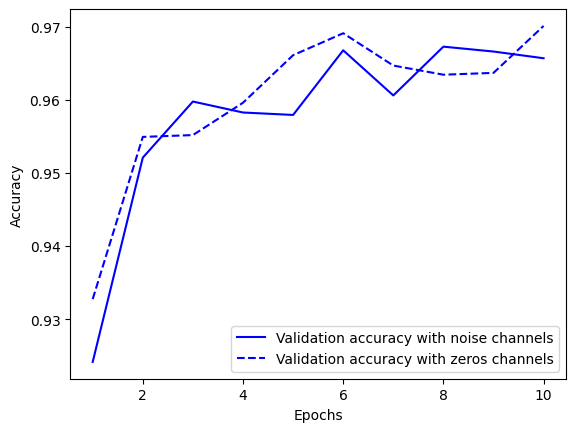

In [3]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs=range(1,11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 7ms/step - loss: 2.3158 - accuracy: 0.1031 - val_loss: 2.3034 - val_accuracy: 0.1074
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2992 - accuracy: 0.1156 - val_loss: 2.3126 - val_accuracy: 0.1026
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2911 - accuracy: 0.1272 - val_loss: 2.3167 - val_accuracy: 0.0997
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2782 - accuracy: 0.1406 - val_loss: 2.3314 - val_accuracy: 0.1002
Epoch 5/100
375/375 [==============================] - 2s 7ms/step - loss: 2.2637 - accuracy: 0.1517 - val_loss: 2.3452 - val_accuracy: 0.0969
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2440 - accuracy: 0.1647 - val_loss: 2.3573 - val_accuracy: 0.0967
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2206 - accuracy: 0.1802 - val_loss: 2.3753 - val_accuracy: 0.0952

5-5 홀드아웃 검증 구현 예

In [ ]:
num_validation_samples =10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples] # 검증세트
training_data = data[num_validation_samples:] # 훈련세트
model = get_model() # 훈련세트에서 훈련 후 검증세트로 평가
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...)
... # 과정반복
model = get_model() #모델 다시 훈련
model.fit(np.concatenate([training_data, validation_data]), ...)
test_score = model.evaluate(test_data, ...)

5-6 K-겹 교차 검증 구현 예

In [ ]:
k=3
num_validation_samples = len(data)//k
np.random.shuffle(data)
calidation_scores = []
for fold in range(k):
  validation_data = data[num_validation_samples*fold:
                         num_validation_samples*(fold+1)] #검증데이터 선택
  training_data=np.concatenate(
      data[:num_validation_samples*fold],
      data[num_validation_samples*(fold+1):])
  model=get_model() #훈련되지 않은 새로운 모델 만듦
  model.fit(training_data, ...)
  validation_score=model.evaluate(validation_data, ...)
  validation_scores.append(validation_score)
validation_score=np.average(validation_scores) #검증점수:K개의 폴드 검증 점수 평균
model = get_model()
model.fit(data, ...)
test_score = model.evaluate(test_data, ...) #테스트 데이터 제외 전체 데이터로 최종 모델 훈련